In [1]:
from scipy.io import loadmat
import numpy as np
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers
from keras import Sequential
from keras.regularizers import l2
sns.set_style("darkgrid")

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def load_data(filename =''):
    Data = {}
    loadmat(file_name=filename, mdict=Data)
    X_train = Data['Yt']
    Y_train = Data['Ct']
    X_val = Data['Yv']
    Y_val = Data['Cv']
    return X_train.T,Y_train.T,X_val.T,Y_val.T

$$\Huge \text{Swiss Roll Data} $$

In [3]:
X_train,Y_train,X_val,Y_val = load_data(filename='SwissRollData.mat')
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(25000, 2)
(25000, 2)
(6250, 2)
(6250, 2)


$$\large \text{Visualization} $$

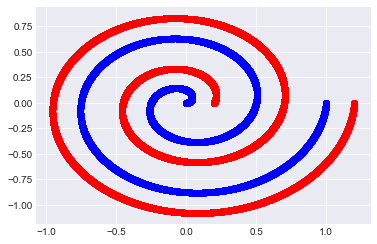

In [4]:
red_idx = Y_train[:,0]==0
plt.scatter(x=X_train[red_idx,0], y=X_train[red_idx,1] ,c='r')
plt.scatter(x=X_train[~red_idx,0], y=X_train[~red_idx,1] ,c='b')

$$\large \text{Correlation Matrix} $$

In [5]:
cor = X_train.T.dot(X_train)
print(cor/np.sum(cor))

[[ 0.5627237  -0.05886637]
 [-0.05886637  0.555009  ]]


$$\large \text{Model} $$

In [7]:
model1 = Sequential()
model1.add(layers.Dense(units=15, activation='relu', input_dim= 2))
model1.add(layers.Dense(units=15, activation='relu'))
model1.add(layers.Dense(units=2, activation='softmax'))
model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
model1.fit(X_train,Y_train, epochs=100,validation_data=(X_val,Y_val), batch_size=64)

Train on 25000 samples, validate on 6250 samples
Epoch 1/100
25000/25000 [==============================] - 1s 23us/step - loss: 0.7065 - acc: 0.4355 - val_loss: 0.6943 - val_acc: 0.4997
Epoch 2/100
25000/25000 [==============================] - 0s 16us/step - loss: 0.6881 - acc: 0.5589 - val_loss: 0.6826 - val_acc: 0.5661
Epoch 3/100
25000/25000 [==============================] - 0s 15us/step - loss: 0.6783 - acc: 0.5785 - val_loss: 0.6740 - val_acc: 0.5618
Epoch 4/100
25000/25000 [==============================] - 0s 17us/step - loss: 0.6702 - acc: 0.5622 - val_loss: 0.6665 - val_acc: 0.5626
Epoch 5/100
25000/25000 [==============================] - 0s 19us/step - loss: 0.6634 - acc: 0.5591 - val_loss: 0.6594 - val_acc: 0.5594
Epoch 6/100
25000/25000 [==============================] - 0s 16us/step - loss: 0.6563 - acc: 0.5487 - val_loss: 0.6524 - val_acc: 0.5622
Epoch 7/100
25000/25000 [==============================] - 0s 16us/step - loss: 0.6499 - acc: 0.5431 - val_loss: 0.6463 - v

25000/25000 [==============================] - 1s 21us/step - loss: 0.5575 - acc: 0.6602 - val_loss: 0.5527 - val_acc: 0.6757
Epoch 60/100
25000/25000 [==============================] - 1s 20us/step - loss: 0.5545 - acc: 0.6641 - val_loss: 0.5496 - val_acc: 0.6742
Epoch 61/100
25000/25000 [==============================] - 0s 19us/step - loss: 0.5517 - acc: 0.6680 - val_loss: 0.5466 - val_acc: 0.6773
Epoch 62/100
25000/25000 [==============================] - 1s 21us/step - loss: 0.5488 - acc: 0.6717 - val_loss: 0.5439 - val_acc: 0.6770
Epoch 63/100
25000/25000 [==============================] - 1s 22us/step - loss: 0.5460 - acc: 0.6740 - val_loss: 0.5409 - val_acc: 0.6936
Epoch 64/100
25000/25000 [==============================] - 1s 21us/step - loss: 0.5433 - acc: 0.6820 - val_loss: 0.5383 - val_acc: 0.7091
Epoch 65/100
25000/25000 [==============================] - 1s 25us/step - loss: 0.5407 - acc: 0.6925 - val_loss: 0.5359 - val_acc: 0.7104
Epoch 66/100
25000/25000 [==============

In [6]:
model1 = Sequential()
model1.add(layers.Dense(units=15, activation='relu', input_dim= 2))
model1.add(layers.Dense(units=15, activation='relu'))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(units=15, activation='relu'))
model1.add(layers.Dense(units=2, activation='softmax'))
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model1.fit(X_train,Y_train, epochs=20,validation_data=(X_val,Y_val), batch_size=64)

Train on 25000 samples, validate on 6250 samples
Epoch 1/20
25000/25000 [==============================] - 1s 59us/step - loss: 0.6537 - acc: 0.5883 - val_loss: 0.6167 - val_acc: 0.5138
Epoch 2/20
25000/25000 [==============================] - 1s 27us/step - loss: 0.5841 - acc: 0.6021 - val_loss: 0.5323 - val_acc: 0.7282
Epoch 3/20
25000/25000 [==============================] - 1s 35us/step - loss: 0.5235 - acc: 0.7179 - val_loss: 0.4913 - val_acc: 0.7344
Epoch 4/20
25000/25000 [==============================] - 1s 27us/step - loss: 0.4863 - acc: 0.7286 - val_loss: 0.4297 - val_acc: 0.7360
Epoch 5/20
25000/25000 [==============================] - 1s 31us/step - loss: 0.4119 - acc: 0.7491 - val_loss: 0.3341 - val_acc: 0.9333
Epoch 6/20
25000/25000 [==============================] - 1s 33us/step - loss: 0.3124 - acc: 0.8673 - val_loss: 0.1711 - val_acc: 0.9597
Epoch 7/20
25000/25000 [==============================] - 1s 30us/step - loss: 0.1958 - acc: 0.9322 - val_loss: 0.1066 - val_acc:

$$\Huge \text{Peaks Data} $$

In [12]:
X_train,Y_train,X_val,Y_val = load_data(filename='PeaksData.mat')
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(25000, 2)
(25000, 5)
(6250, 2)
(6250, 5)


$$\large \text{Visualization} $$

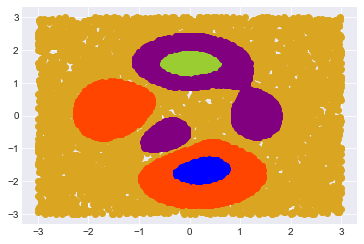

In [144]:
yellow_idx = Y_train[:, 2]==1
green_idx = Y_train[:, 4]==1
purple_idx = Y_train[:, 3]==1
blue_idx = Y_train[:, 0]==1
orange_idx = Y_train[:, 1]==1
plt.scatter(x=X_train[yellow_idx,0], y=X_train[yellow_idx,1] ,c='goldenrod')
plt.scatter(x=X_train[blue_idx,0], y=X_train[blue_idx,1] ,c='blue')
plt.scatter(x=X_train[orange_idx,0], y=X_train[orange_idx,1] ,c='orangered')
plt.scatter(x=X_train[green_idx,0], y=X_train[green_idx,1] ,c='yellowgreen')
plt.scatter(x=X_train[purple_idx,0], y=X_train[purple_idx,1] ,c='purple')

$$\large \text{Correlation Matrix} $$

In [145]:
cor = X_train.T.dot(X_train)
print(cor/np.sum(cor))

[[ 0.35370395 -0.0322979 ]
 [-0.0322979   0.71089184]]


$$\large \text{Polynomial Kernel} $$

In [121]:
x12_train = X_train[:,0]*X_train[:,1]
x12_val = X_val[:,0]*X_val[:,1]
x11_train = X_train[:,0]*X_train[:,0]
x11_val = X_val[:,0]*X_val[:,0]
x11_train = X_train[:,1]*X_train[:,1]
x11_val = X_val[:,1]*X_val[:,1]
x112_train = X_train[:,0]*X_train[:,0]*X_train[:,1]
x112_val = X_val[:,0]*X_val[:,0]*X_val[:,1]
x122_train = X_train[:,0]*X_train[:,1]*X_train[:,1]
x122_val = X_val[:,0]*X_val[:,1]*X_val[:,1]
x111_train = X_train[:,0]*X_train[:,0]*X_train[:,0]
x111_val = X_val[:,0]*X_val[:,0]*X_val[:,0]
x222_train = X_train[:,1]*X_train[:,1]*X_train[:,1]
x222_val = X_val[:,1]*X_val[:,1]*X_val[:,1]


X_train = np.column_stack((X_train,x12_train, x11_train, x112_train, x122_train, x111_train, x222_train))
X_val = np.column_stack((X_val,x12_val, x11_val, x112_val, x122_val, x111_val, x222_val))
print(X_train.shape)
print(X_val.shape)

(25000, 8)
(6250, 8)


$$\large \text{Model} $$

In [126]:
model2 = Sequential()
model2.add(layers.Dense(units=60, activation='relu', input_dim= 8))
model2.add(layers.Dense(units=60, activation='relu'))
model2.add(layers.Dense(units=60, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(units=40, activation='relu'))
model2.add(layers.Dense(units=40, activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(units=20, activation='relu'))
model2.add(layers.Dense(units=5, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model2.fit(X_train,Y_train, epochs=53,validation_data=(X_val,Y_val), batch_size=128)

Train on 25000 samples, validate on 6250 samples
Epoch 1/53
25000/25000 [==============================] - 4s 152us/step - loss: 0.7840 - acc: 0.7029 - val_loss: 0.2404 - val_acc: 0.9099
Epoch 2/53
25000/25000 [==============================] - 1s 38us/step - loss: 0.2318 - acc: 0.9152 - val_loss: 0.1087 - val_acc: 0.9562
Epoch 3/53
25000/25000 [==============================] - 1s 39us/step - loss: 0.1489 - acc: 0.9448 - val_loss: 0.0906 - val_acc: 0.9651
Epoch 4/53
25000/25000 [==============================] - 1s 38us/step - loss: 0.1140 - acc: 0.9590 - val_loss: 0.0565 - val_acc: 0.9819
Epoch 5/53
25000/25000 [==============================] - 1s 39us/step - loss: 0.1030 - acc: 0.9612 - val_loss: 0.0544 - val_acc: 0.9797
Epoch 6/53
25000/25000 [==============================] - 1s 38us/step - loss: 0.0866 - acc: 0.9686 - val_loss: 0.0564 - val_acc: 0.9811
Epoch 7/53
25000/25000 [==============================] - 1s 39us/step - loss: 0.0849 - acc: 0.9691 - val_loss: 0.0484 - val_acc

$$\Huge \text{GMM Data} $$

In [127]:
X_train,Y_train,X_val,Y_val = load_data(filename='GMMData.mat')
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(25000, 5)
(25000, 5)
(6250, 5)
(6250, 5)


$$\large \text{t-sne Visualization} $$

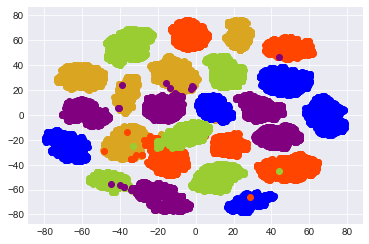

In [135]:
t_sne = manifold.TSNE(n_components=2)
X_visualization = t_sne.fit_transform(X_train)

yellow_idx = Y_train[:, 2]==1
green_idx = Y_train[:, 4]==1
purple_idx = Y_train[:, 3]==1
blue_idx = Y_train[:, 0]==1
orange_idx = Y_train[:, 1]==1
plt.scatter(x=X_visualization[yellow_idx,0], y=X_visualization[yellow_idx,1] ,c='goldenrod')
plt.scatter(x=X_visualization[blue_idx,0], y=X_visualization[blue_idx,1] ,c='blue')
plt.scatter(x=X_visualization[orange_idx,0], y=X_visualization[orange_idx,1] ,c='orangered')
plt.scatter(x=X_visualization[green_idx,0], y=X_visualization[green_idx,1] ,c='yellowgreen')
plt.scatter(x=X_visualization[purple_idx,0], y=X_visualization[purple_idx,1] ,c='purple')

$$\large \text{Correlation Matrix} $$

In [137]:
cor = X_train.T.dot(X_train)
print(cor/np.sum(cor))

[[0.06956109 0.04304842 0.03756722 0.03721923 0.04712403]
 [0.04304842 0.04645383 0.0329813  0.03475023 0.03870407]
 [0.03756722 0.0329813  0.04200448 0.02763767 0.03298492]
 [0.03721923 0.03475023 0.02763767 0.04621023 0.03880816]
 [0.04712403 0.03870407 0.03298492 0.03880816 0.05411984]]


$$\large \text{Model} $$

In [129]:
model3 = Sequential()
model3.add(layers.Dense(units=60, activation='relu', input_dim= 5))
model3.add(layers.Dense(units=60, activation='relu'))
model3.add(layers.Dense(units=60, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(units=40, activation='relu'))
model3.add(layers.Dense(units=40, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(units=20, activation='relu'))
model3.add(layers.Dense(units=20, activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(units=5, activation='softmax'))
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model3.fit(X_train,Y_train, epochs=53,validation_data=(X_val,Y_val), batch_size=128)

Train on 25000 samples, validate on 6250 samples
Epoch 1/53
25000/25000 [==============================] - 4s 173us/step - loss: 1.1372 - acc: 0.5084 - val_loss: 0.4603 - val_acc: 0.8530
Epoch 2/53
25000/25000 [==============================] - 1s 42us/step - loss: 0.4261 - acc: 0.8402 - val_loss: 0.1237 - val_acc: 0.9666
Epoch 3/53
25000/25000 [==============================] - 1s 43us/step - loss: 0.1865 - acc: 0.9432 - val_loss: 0.0599 - val_acc: 0.9826
Epoch 4/53
25000/25000 [==============================] - 1s 43us/step - loss: 0.1126 - acc: 0.9692 - val_loss: 0.0368 - val_acc: 0.9880
Epoch 5/53
25000/25000 [==============================] - 1s 42us/step - loss: 0.0895 - acc: 0.9760 - val_loss: 0.0414 - val_acc: 0.9861
Epoch 6/53
25000/25000 [==============================] - 1s 49us/step - loss: 0.0745 - acc: 0.9793 - val_loss: 0.0357 - val_acc: 0.9890
Epoch 7/53
25000/25000 [==============================] - 1s 44us/step - loss: 0.0741 - acc: 0.9794 - val_loss: 0.0430 - val_acc